# 911 Calls Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## EDA

In [4]:
df['Reason'] = df['title'].apply(lambda x: x.split(': ')[0])

In [5]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [6]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [7]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

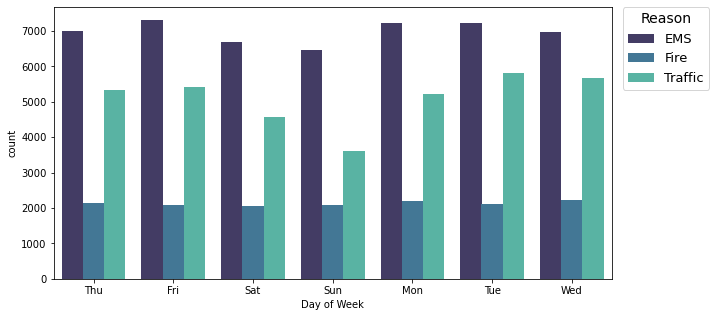

In [8]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='mako')
plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0, title='Reason',fontsize=13,title_fontsize=14)

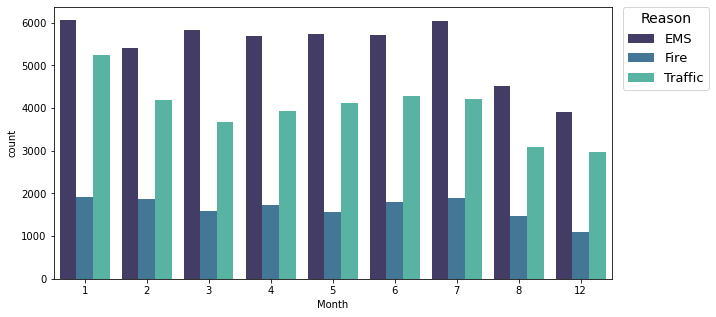

In [9]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Month', data=df, hue='Reason', palette='mako')
plt.legend(bbox_to_anchor=(1.02,1), borderaxespad=0, title='Reason',fontsize=13,title_fontsize=14, loc=2)

In [10]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

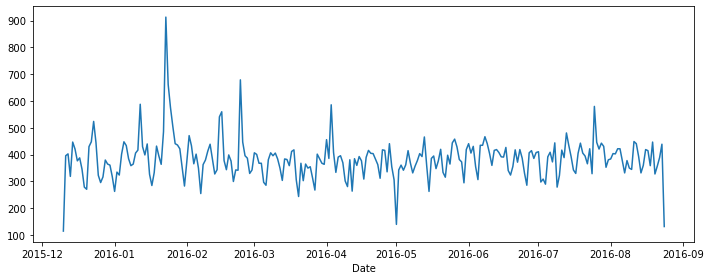

In [11]:
fig = plt.figure(figsize=(10,4))
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

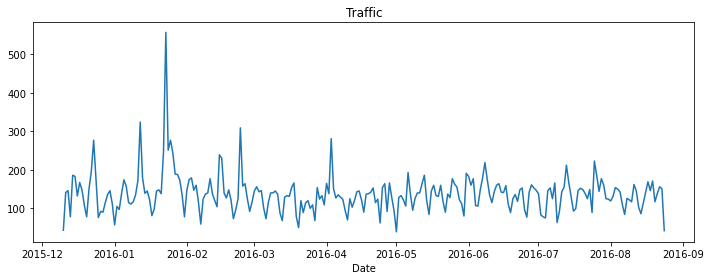

In [12]:
fig = plt.figure(figsize=(10,4))
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

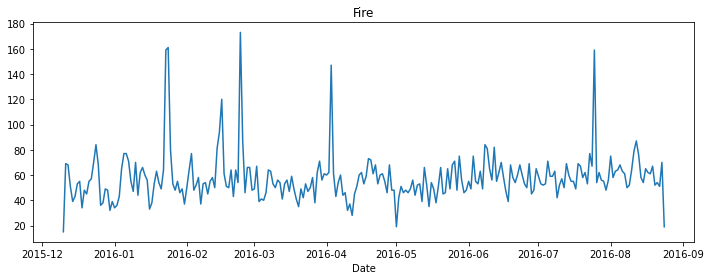

In [13]:
fig = plt.figure(figsize=(10,4))
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

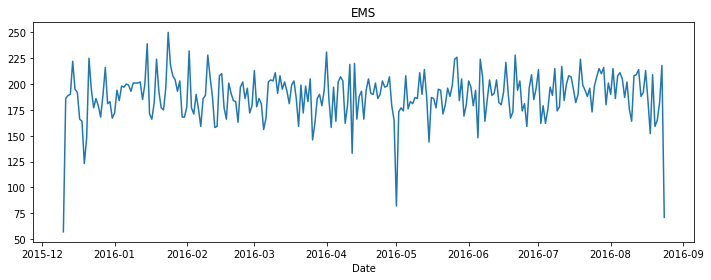

In [14]:
fig = plt.figure(figsize=(10,4))
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [15]:
hm = df.groupby(by=['Day of Week','Hour']).count()['lat'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

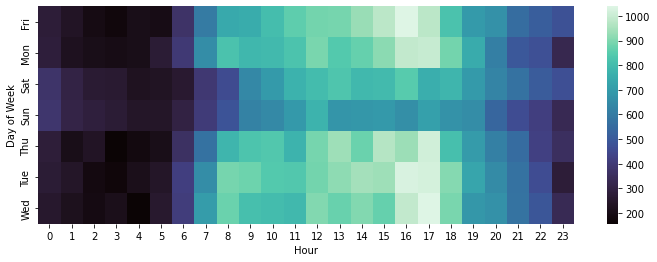

In [16]:
plt.figure(figsize=(12,4))
sns.heatmap(hm,cmap='mako')

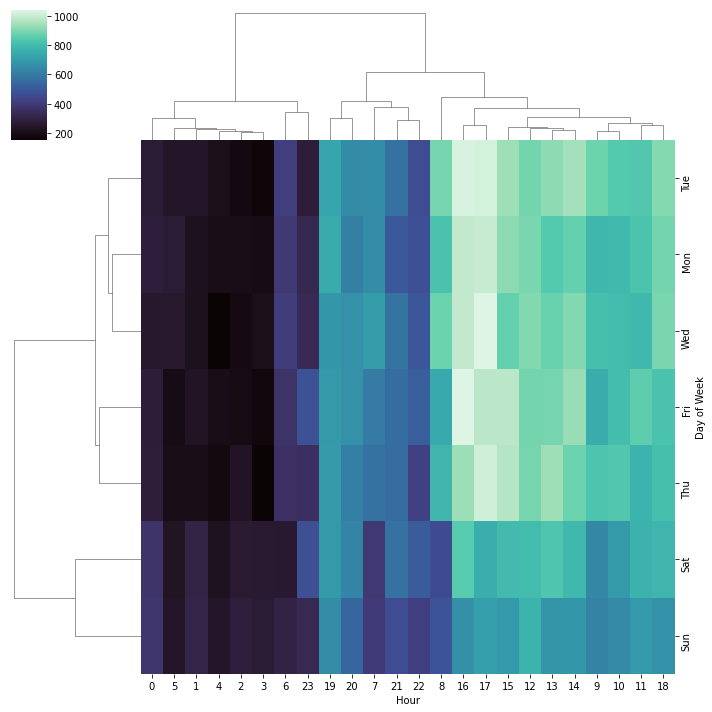

In [17]:
sns.clustermap(hm,cmap='mako')

In [18]:
ht = df.groupby(by=['Day of Week','Month']).count()['lat'].unstack()

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

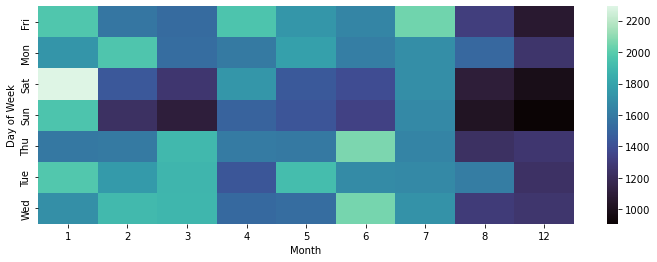

In [19]:
plt.figure(figsize=(12,4))
sns.heatmap(ht,cmap='mako')

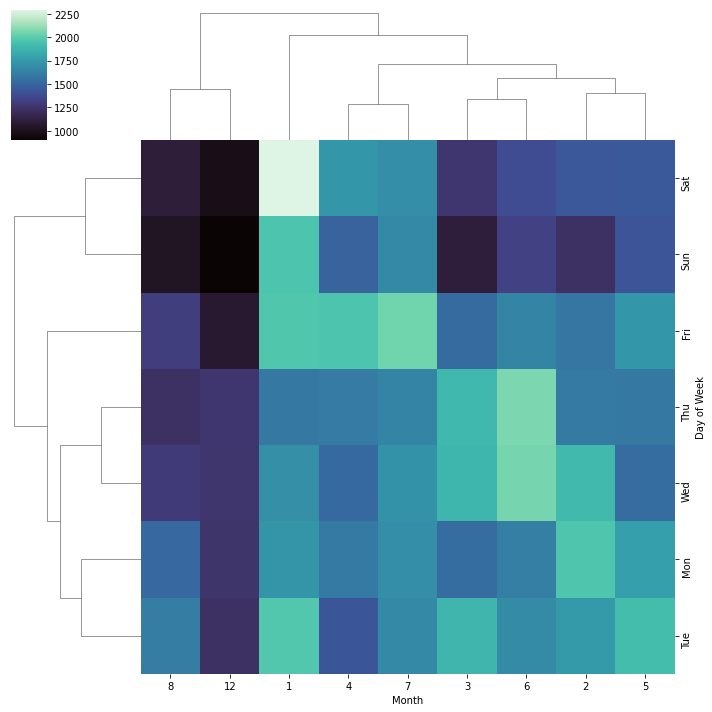

In [20]:
sns.clustermap(ht,cmap='mako')

<AxesSubplot:title={'center':'Traffic'}>

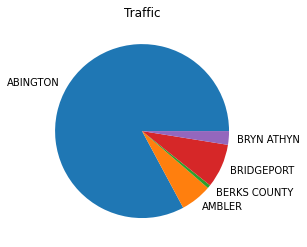

In [21]:
df[df['Reason']=='Traffic'].groupby('twp').count()['lat'].iloc[0:5].plot(kind='pie',ylabel='',title='Traffic')

<AxesSubplot:title={'center':'Fire'}>

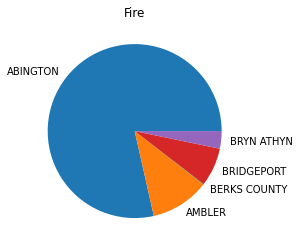

In [22]:
df[df['Reason']=='Fire'].groupby('twp').count()['lat'].iloc[0:5].plot(kind='pie',ylabel='',title='Fire')

<AxesSubplot:title={'center':'EMS'}>

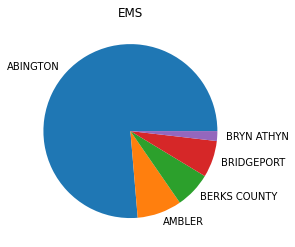

In [23]:
df[df['Reason']=='EMS'].groupby('twp').count()['lat'].iloc[0:5].plot(kind='pie',ylabel='',title='EMS')